Bonus Assignment for Week-2

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/ayushsaksena/Desktop/Interests/SOM/datasets/final_cccf.csv')
df.head()

,ss_username,cf_username,cf_rating,cc_username,cc_rating
0,eldnahon,slime,3449.0,peehs_moorhsum,3007.0
1,jora,NaN,NaN,uwi,2906.0
2,lala,NaN,NaN,kal013,2756.0
3,wesnerm,NaN,NaN,wmoise,2696.0
4,grebnesieh,grebnesieh,1703.0,grebnesieh,2673.0


Dropping all the rows that contain any of the values as NaN

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 0 to 10278
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ss_username  6442 non-null   object 
 1   cf_username  6442 non-null   object 
 2   cf_rating    6442 non-null   float64
 3   cc_username  6442 non-null   object 
 4   cc_rating    6442 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.0+ KB


Using Train,Test,Split to split test and train dataset

In [4]:
from sklearn.model_selection import train_test_split
X=df['cf_rating'].values.reshape(-1,1)
Y=df['cc_rating'].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33,random_state=1)

Using In-built model to fit on training data

Text(0.5, 1.0, 'Trained Model')

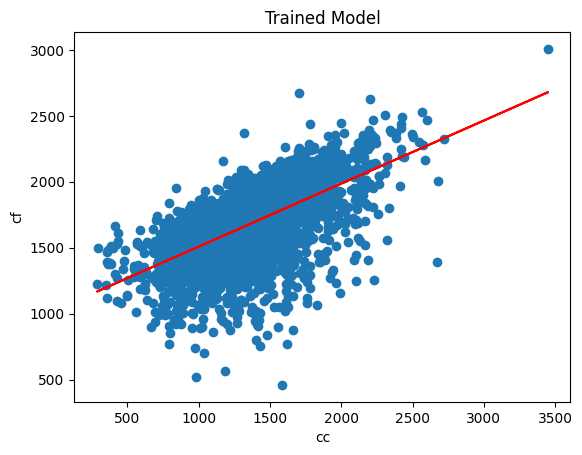

In [5]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

plt.scatter(X_train,Y_train)
plt.plot(X_train,X_train*reg.coef_ + reg.intercept_,color='red')
plt.xlabel('cc')
plt.ylabel('cf')
plt.title('Trained Model')

Testing to find accuracy of this model

In [6]:
reg.score(X_test,Y_test)

0.373772895824219

Training a model from Scratch.

Iteration 0: m [0.47338435], b [0.00033728], cost [2907599.75996293]
Iteration 100: m [1.18730073], b [0.00197361], cost [97348.45802352]
Iteration 200: m [1.18729994], b [0.00311855], cost [97348.32693635]
Iteration 300: m [1.18729915], b [0.00426348], cost [97348.19584947]
Iteration 400: m [1.18729836], b [0.00540841], cost [97348.06476288]

Final values after gradient descent:
m [1.18729758], b [0.00654189], cost [97347.93498745]


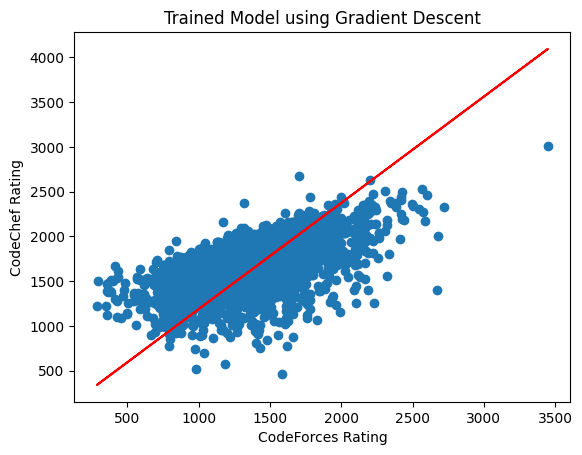

In [7]:
def gradient_descent(x, y):
    m_curr = b_curr = 0
    n = len(x)
    iterations = 500
    learning_rate = 0.0000001  # Adjusted learning rate for stability

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        cost=(1/n)*sum([val**2 for val in (y-y_predicted)])

        m_curr -= md * learning_rate
        b_curr -= bd * learning_rate
        
        # Print intermediate results for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: m {m_curr}, b {b_curr}, cost {cost}")

    print("\nFinal values after gradient descent:")
    print(f"m {m_curr}, b {b_curr}, cost {cost}")

    plt.plot(x, x * m_curr + b_curr, color='red')
    plt.scatter(x, y, marker='o')
    plt.xlabel('CodeForces Rating')
    plt.ylabel('CodeChef Rating')
    plt.title('Trained Model using Gradient Descent')
    plt.show()

gradient_descent(X_train,Y_train)
